<a href="https://colab.research.google.com/github/rsanch12/ECGR-4105-FALL_2025/blob/main/HW2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv")
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = df['price']
display(X.head())
display(y.head())

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled[:5])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (436, 5)
Shape of X_val: (109, 5)
Shape of y_train: (436,)
Shape of y_val: (109,)


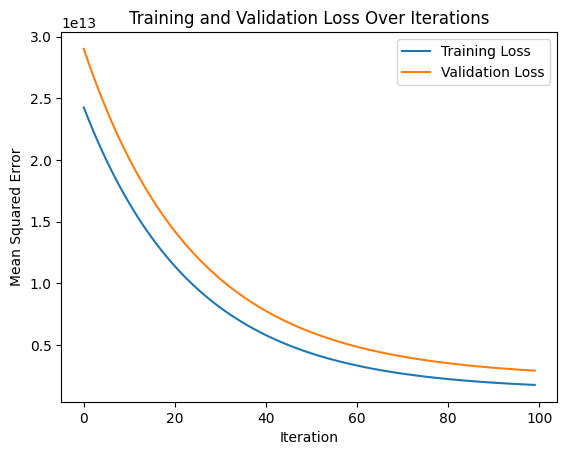

In [18]:
import numpy as np
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
theta = np.random.randn(n_features + 1, 1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

learning_rate = 0.01
n_iterations = 100

train_losses = []
val_losses = []

m = len(X_train)

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)

    # Update theta
    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

# Plot  training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [19]:
final_val_loss = val_losses[-1]
print(f"Final Validation Loss (Mean Squared Error): {final_val_loss}")

Final Validation Loss (Mean Squared Error): 2929684794753.9023


In [20]:
print("Learned Parameters:")
print(f"Intercept: {theta[0][0]}")

feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i in range(len(feature_names)):
    print(f"{feature_names[i]} Coefficient: {theta[i+1][0]}")

Learned Parameters:
Intercept: 4105838.3558278126
area Coefficient: 619576.9692568588
bedrooms Coefficient: 220422.28016464648
bathrooms Coefficient: 472551.8173402806
stories Coefficient: 361391.7450669105
parking Coefficient: 310786.68462902063


In [21]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']
display(X.head())
display(y.head())

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,yes,no,no,no,yes,2,yes
1,8960,4,4,4,yes,no,no,no,yes,3,no
2,9960,3,2,2,yes,no,yes,no,no,2,yes
3,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,7420,4,1,2,yes,yes,yes,no,yes,2,no


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Find categorical and numerical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_scaled = pipeline.fit_transform(X)
display(X_scaled[:5])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (436, 17)
Shape of X_val: (109, 17)
Shape of y_train: (436,)
Shape of y_val: (109,)


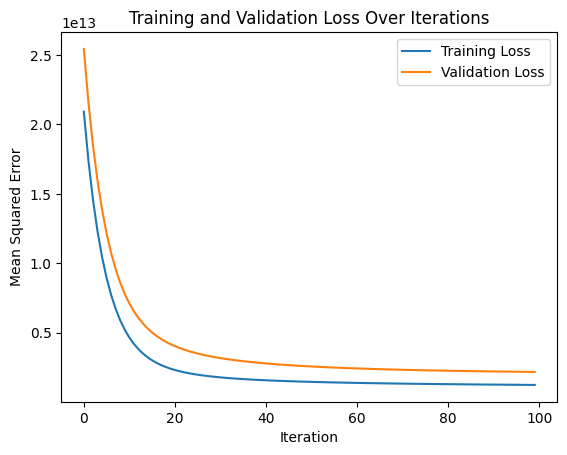

In [24]:
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
theta = np.random.randn(n_features + 1, 1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

learning_rate = 0.01
n_iterations = 100

train_losses = []
val_losses = []

m = len(X_train)

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)

    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

# Plot training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [25]:
final_val_loss = val_losses[-1]
print(f"Final Validation Loss (Mean Squared Error): {final_val_loss}")

Final Validation Loss (Mean Squared Error): 2161255266364.4717


In [26]:
print("Learned Parameters:")
print(f"Intercept: {theta[0][0]}")

feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i in range(len(feature_names)):
    print(f"{feature_names[i]} Coefficient: {theta[i+1][0]}")

Learned Parameters:
Intercept: 1042157.2050311231
area Coefficient: 540306.643339961
bedrooms Coefficient: 210942.85156522846
bathrooms Coefficient: 509337.8522018887
stories Coefficient: 347212.76502706704
parking Coefficient: 273318.7218244263
